In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import IPython.display
import numpy as np
from pycaret.time_series import TSForecastingExperiment
import os
import plotly.express as px
from pmdarima import auto_arima
os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

In [2]:
df = pd.read_csv(r'../data/01_raw/incidents.csv')


In [3]:
df.head()

,date_exploitation,etat_failed,etat_passed,avg_failed_duree,avg_succeed_duree
0,2023-06-02,32,9067,8.312500,173.505680
1,2023-06-01,44,13618,1632.477273,429.200029
2,2023-05-31,43,13574,5282.534884,447.581848
3,2023-05-30,66,13501,8.469697,471.166728
4,2023-05-29,51,13063,8.078431,480.294266


In [4]:
df['date_exploitation'] = pd.to_datetime(df['date_exploitation'])

In [5]:
df.set_index('date_exploitation', inplace=True)

In [6]:
df = df.asfreq('D')

In [7]:
df

,etat_failed,etat_passed,avg_failed_duree,avg_succeed_duree
date_exploitation,,,,
2021-11-18,88.0,676.0,991.352273,130.464497
2021-11-19,5.0,100.0,483.400000,878.870000
2021-11-20,NaN,NaN,NaN,NaN
2021-11-21,NaN,NaN,NaN,NaN
2021-11-22,12.0,269.0,1.500000,729.788104
...,...,...,...,...
2023-05-29,51.0,13063.0,8.078431,480.294266
2023-05-30,66.0,13501.0,8.469697,471.166728
2023-05-31,43.0,13574.0,5282.534884,447.581848


In [8]:
df = df[['etat_failed']]
df['etat_failed'] = df['etat_failed'].fillna(0)
df

,etat_failed
date_exploitation,
2021-11-18,88.0
2021-11-19,5.0
2021-11-20,0.0
2021-11-21,0.0
2021-11-22,12.0
...,...
2023-05-29,51.0
2023-05-30,66.0
2023-05-31,43.0


In [9]:
df['weekday'] = df.index.weekday
df

,etat_failed,weekday
date_exploitation,,
2021-11-18,88.0,3
2021-11-19,5.0,4
2021-11-20,0.0,5
2021-11-21,0.0,6
2021-11-22,12.0,0
...,...,...
2023-05-29,51.0,0
2023-05-30,66.0,1
2023-05-31,43.0,2


In [55]:
#df_mon = df[df['weekday'] == 0]

In [10]:
df_check = df[['etat_failed']]

<Axes: xlabel='date_exploitation'>

[06/05/23 10:02:05] WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=418027;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=677037;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=230988;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=473339;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=670896;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=8913;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=840312;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=361612;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=897319;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=520841;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=467537;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=559311;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=360143;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=259843;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=832029;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=871695;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=227986;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=368877;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=552633;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=386337;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=421413;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=704673;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=166450;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=408834;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=632997;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=559740;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=257434;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=657332;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=460222;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=861049;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=233580;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=851253;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=926151;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=616561;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=854684;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=341036;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=301141;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=862402;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=329812;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=931063;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=700256;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=678682;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=404509;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=583945;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=543144;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=707040;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=557924;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=376655;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=160072;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=816918;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=404864;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=829538;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=774303;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=953645;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=219180;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=358103;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=431822;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=535384;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=774161;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=329624;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=737826;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=681868;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=896471;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=985726;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=49282;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=87467;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=663463;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=375077;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=663985;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=631213;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=330873;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=748254;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=775358;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=330249;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=354371;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=713914;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=718505;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=558847;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=239640;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=904441;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=821579;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=16042;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=334014;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=707536;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=920070;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=446487;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=626103;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=39955;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=329723;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=458941;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=4123;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=415563;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=661768;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=716695;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=492963;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=154030;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=295721;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=126420;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=310536;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=797509;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=642153;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=911286;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=253520;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=604347;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=474263;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=127312;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=395605;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=425604;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=672707;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=861402;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=100846;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=101745;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=271497;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=106985;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=805428;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=393939;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=351575;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=673455;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=39872;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=597370;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=226506;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=303943;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=907037;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=297648;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=511678;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=600343;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=783747;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=336939;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=124765;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=14348;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=706525;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=796794;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=710795;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=33759;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=734252;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=662012;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=932944;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=978298;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=511532;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=144595;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=581702;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=864808;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=651960;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=238909;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=28891;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=879868;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=440732;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=909811;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=792939;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=526809;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=653158;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=304256;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=648528;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=230862;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=861618;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=672169;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=156949;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=906100;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=610014;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=222810;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=296596;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=890516;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=113325;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=552889;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=405818;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=741574;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=213725;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=436281;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=831223;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=801351;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=914926;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=221540;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=283954;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=454835;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=795626;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=703529;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=495598;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=236784;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=626646;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=455109;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

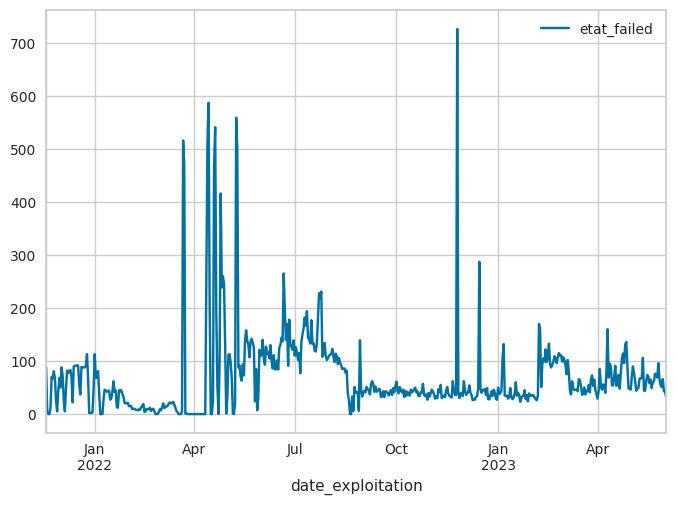

In [11]:
df_check.plot()

## Stationary check

[06/05/23 10:02:18] WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=804272;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=558107;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=793139;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=488614;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=137678;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=806242;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=64129;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=924197;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=856746;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=516657;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=345992;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=717816;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=420713;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=961965;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=84812;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=507447;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=864462;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=686096;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=649867;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=146340;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=967456;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=946077;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=936437;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=318357;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=669592;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=595561;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=61225;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=284850;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=622323;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=845037;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=296109;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=242941;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=953600;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=967482;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=10998;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=237300;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=947491;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=771131;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=621087;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=786034;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=476842;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=389713;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=224288;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=142641;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=985740;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=289812;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=714435;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=222102;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=583779;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=330720;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=679752;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=408450;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=676621;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=306284;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=62716;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=441754;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=13426;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=845019;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

[06/05/23 10:02:19] WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=148146;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=897892;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=798126;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=987312;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=32825;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=605154;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=999070;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=904802;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=117657;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=739144;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=421297;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=985590;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=351004;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=119879;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=363966;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=265907;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=678514;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=665935;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=110303;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=528163;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=138302;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=589406;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=143686;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=790376;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=627311;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=836353;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=522786;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=912565;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=743270;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=981379;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=339274;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=751608;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=463100;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=879672;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=860210;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=901083;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=441843;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=855880;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=941711;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=132607;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=953360;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=85767;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=675339;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=669693;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=628469;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=937205;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=563683;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=204096;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=205195;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=515512;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=314941;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=922230;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=929874;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=918869;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=493559;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=689192;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=982457;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=140265;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=29830;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=162616;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=94629;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=522540;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=121609;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=136214;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=88231;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=766317;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=816160;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=820617;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=870011;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=400200;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=506328;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=836588;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=902267;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=167461;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=853474;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=788867;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=669486;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=339220;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=432860;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=30985;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=766121;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=214793;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=113411;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=550119;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=984908;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=176975;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=813741;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=205189;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=162075;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=430500;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=604020;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=273112;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=844171;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=508985;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=591138;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=479998;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=482415;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=304322;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=615121;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=966604;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=550476;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=403284;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=630518;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=1189;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=842663;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=357936;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=29061;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=838628;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=367710;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=458153;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=395298;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=833328;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=814911;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=454754;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=463343;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=750090;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=596680;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=173868;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=304124;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=318470;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=197637;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=685225;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=446358;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=608095;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=545949;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=453444;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=43702;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=201248;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=212368;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=243605;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=748198;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=134400;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=516095;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=946868;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=908143;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=86632;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=74214;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=539060;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=111549;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=716224;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=470899;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=648837;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=19451;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=531949;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=375176;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=842110;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=950241;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=294437;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=101878;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=958313;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=78823;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=551914;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=838452;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=969534;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=28265;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=606091;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=102756;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=505585;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=982845;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=49259;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

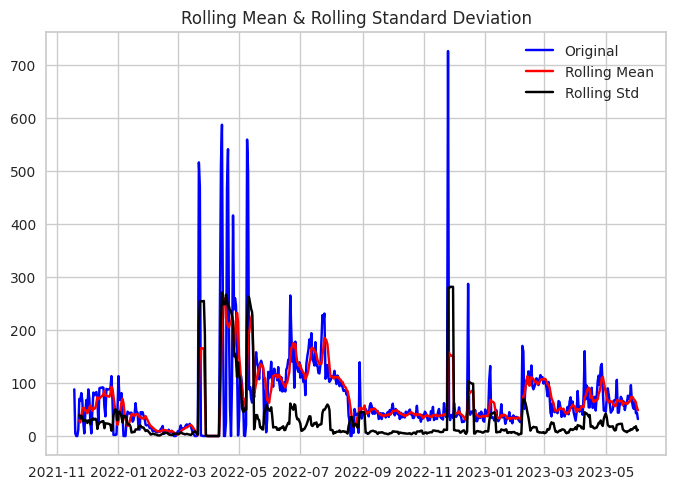

In [12]:
rolling_mean = df_check.rolling(window = 6).mean()
rolling_std = df_check.rolling(window = 6).std()
plt.plot(df_check, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [13]:
### Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

In [14]:
test_result=adfuller(df['etat_failed'])

In [15]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [16]:
adfuller_test(df['etat_failed'])

ADF Test Statistic : -2.8980724025742717
p-value : 0.04557261043330856
#Lags Used : 19
Number of Observations Used : 542
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## Differencing

In [17]:
#df['etat (first difference)'] = df['etat_failed'] - df['etat_failed'].shift(1)

In [18]:
df['etat_failed'].shift(1)

date_exploitation
2021-11-18     NaN
2021-11-19    88.0
2021-11-20     5.0
2021-11-21     0.0
2021-11-22     0.0
              ... 
2023-05-29    55.0
2023-05-30    51.0
2023-05-31    66.0
2023-06-01    43.0
2023-06-02    44.0
Freq: D, Name: etat_failed, Length: 562, dtype: float64

In [19]:
df['Seasonal First Difference']=df['etat_failed']-df['etat_failed'].shift(6)

In [20]:
df.head(14)

,etat_failed,weekday,Seasonal First Difference
date_exploitation,,,
2021-11-18,88.0,3,NaN
2021-11-19,5.0,4,NaN
2021-11-20,0.0,5,NaN
2021-11-21,0.0,6,NaN
2021-11-22,12.0,0,NaN
2021-11-23,70.0,1,NaN
2021-11-24,67.0,2,-21.0
2021-11-25,81.0,3,76.0
2021-11-26,67.0,4,67.0


In [21]:
df.tail()

,etat_failed,weekday,Seasonal First Difference
date_exploitation,,,
2023-05-29,51.0,0,-25.0
2023-05-30,66.0,1,-9.0
2023-05-31,43.0,2,-26.0
2023-06-01,44.0,3,-52.0
2023-06-02,32.0,4,-34.0


In [22]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -6.72907717928629
p-value : 3.331455209794303e-09
#Lags Used : 19
Number of Observations Used : 536
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='date_exploitation'>

[06/05/23 10:02:56] WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=312358;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=928486;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=337469;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=140405;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=640899;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=408875;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=468407;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=757917;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=636415;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=18691;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=824325;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=418676;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=339523;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=499543;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=252342;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=48291;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=798430;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=92637;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=542269;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=43726;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=967588;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=138327;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=978951;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=930386;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=65592;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=5678;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=836365;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=944373;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=593996;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=81478;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=292717;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=115575;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=683016;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=522088;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=70452;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=21134;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=848027;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=485573;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=506848;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=804292;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=100157;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=89416;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=696984;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=12483;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=546237;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=994782;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=627598;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=756849;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=766782;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=758036;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=503245;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=78393;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=3432;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=918921;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=339145;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=398066;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=738919;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=467610;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=648859;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=782165;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=560576;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=586278;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=146091;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=712623;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=463228;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=977394;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=618307;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=292813;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=179116;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=952440;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=602731;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=282518;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=38107;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=231071;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=596274;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=793008;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=807680;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=107829;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=725287;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=66339;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=420453;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=655228;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=173328;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=39731;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=187904;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=908649;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=438201;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=514958;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=345992;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=97202;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=897897;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=273480;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=662562;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=586609;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=850278;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=238877;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=846665;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=141628;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=767029;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=579966;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=637599;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=891436;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=911847;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=690375;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=968309;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=853122;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=745344;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=979008;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=195433;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=110099;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=74696;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=203024;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=22905;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=503892;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=393391;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=662161;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=748870;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=536061;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=958488;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=310991;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=363027;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=155210;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=393203;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=368678;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=491308;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=368003;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=71318;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=540318;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

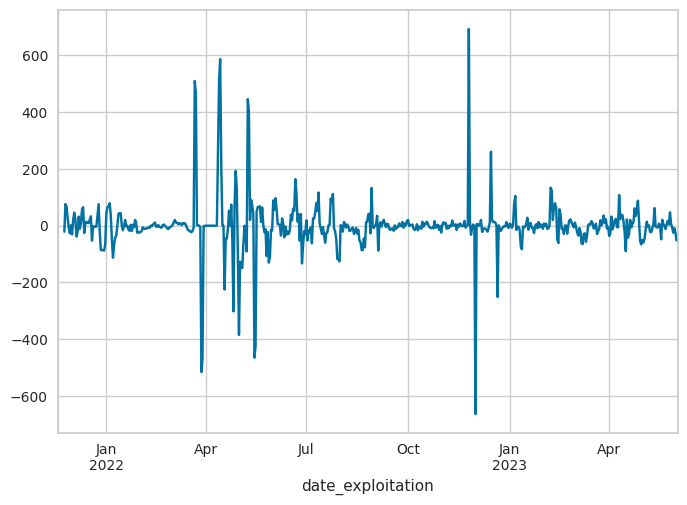

In [23]:
df['Seasonal First Difference'].plot()

In [24]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

[06/05/23 10:03:02] WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=832063;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=790055;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=496328;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=185078;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=962066;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=741383;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=300632;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=507838;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=580729;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=742140;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=100464;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=463736;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=903215;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=564134;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=269093;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=140725;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=421527;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=777473;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=734631;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=929271;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=402191;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=939682;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=914701;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=61495;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=28810;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=88268;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=48324;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=662113;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=261785;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=163396;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=459936;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=910513;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=350404;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=921671;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=321774;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=129137;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=613697;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=701409;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=704199;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=222193;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=221538;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=577596;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=657220;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=624138;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=172999;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=19210;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=311309;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=646982;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=607021;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=712507;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=935798;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=302332;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=194178;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=588209;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=502339;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=298437;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=309664;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=284477;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=69225;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=555724;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=440892;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=864971;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=172746;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=183464;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=786304;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=664624;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=847372;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=990562;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=152544;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=229403;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=742932;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=837377;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=358971;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=715813;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=863038;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=832476;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=924538;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=941437;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=136351;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=348900;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=169559;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=314949;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=684056;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=521786;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=945132;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=241796;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=966713;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=668186;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=733146;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=99662;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=733016;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=909041;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=627614;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=607661;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=127871;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=690533;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=855115;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=382213;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=66137;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=879984;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=587786;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=223895;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=499871;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=68402;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=759563;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=665234;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=71407;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=140287;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=420555;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=250872;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=411873;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=535137;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=963941;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=587180;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=284594;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=289409;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=261352;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=634031;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=873547;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=614697;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=858002;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=422557;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=662663;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=829498;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=412930;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=944184;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=111716;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=584640;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=390788;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=806086;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=4654;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=903400;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=469063;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=448650;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=269256;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=484585;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=336371;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=191024;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=337255;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=314614;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=282897;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=77518;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=886775;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=360883;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=703385;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=154334;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=434842;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=444405;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=133412;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=741771;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=539649;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=843613;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=59331;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=888865;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=479992;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=362880;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=109411;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=541933;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=693750;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=440032;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=256331;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=821290;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=267179;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=596270;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=876096;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=231174;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=648526;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=40691;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=442962;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=13178;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=457494;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=761559;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=484189;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=75166;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=61199;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=693989;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=240462;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=385006;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=474656;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=300455;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=874848;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=714864;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=32182;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=308858;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=159668;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=123952;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=74423;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=867549;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=558431;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=726844;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=911199;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=410272;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

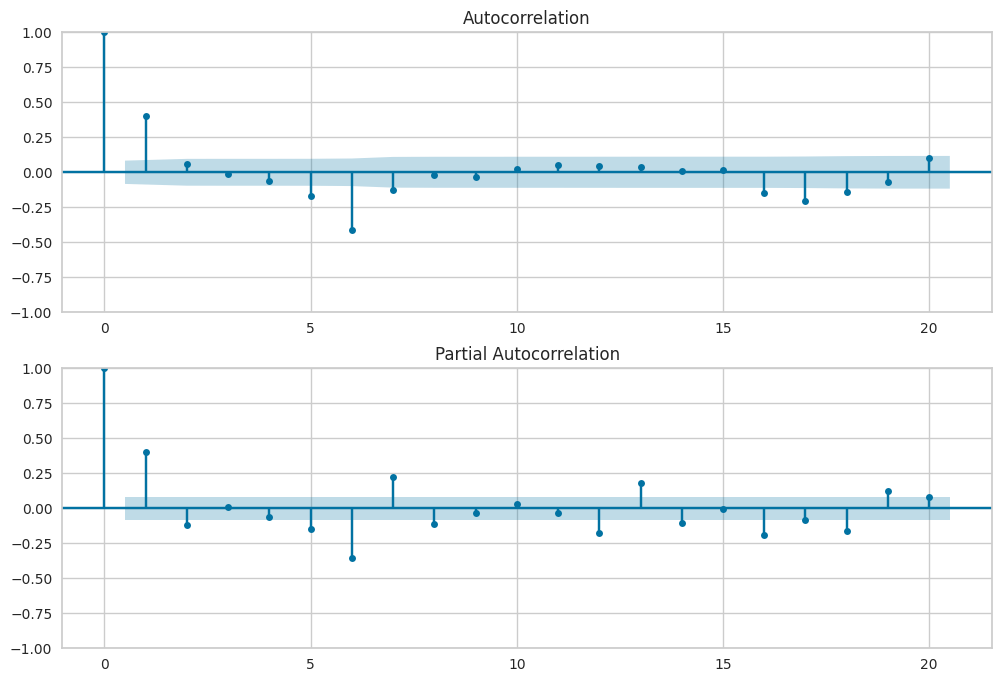

In [25]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal First Difference'].iloc[7:],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal First Difference'].iloc[7:],lags=20,ax=ax2)


[06/05/23 10:03:03] WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=912707;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=180301;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=549136;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=935870;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=943106;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=478573;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=260738;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=708561;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=327957;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=667774;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=405509;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=664181;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=801830;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=303531;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=281991;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=257383;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=287387;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=536878;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=916806;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=690250;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=4305;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=337385;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=986530;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=658929;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=151479;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=411452;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=901218;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=155785;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=905414;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=644634;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=359109;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=542126;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=194787;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=455112;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=89541;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=515977;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=865758;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=288142;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=314625;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=410570;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=147804;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=50460;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=987572;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=847624;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=933876;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=809425;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=569093;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=242074;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=733367;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=205964;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=285244;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=626146;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=396459;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=496924;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=9266;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=561754;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=315617;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=607943;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=379790;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=8389;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=953772;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=413586;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=619500;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=982398;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=586584;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=836543;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=646913;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=437077;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=212235;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=951955;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=458109;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=138121;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=576057;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=291805;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=320375;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=567669;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=853989;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=19487;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=476571;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=355710;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=802164;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=614861;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=684442;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=43402;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=193817;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=812164;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=800972;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=416200;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=307247;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=362955;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=169695;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=238721;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=922793;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=292581;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=915336;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=257750;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=328785;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=674643;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=127376;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=282233;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=188009;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=392031;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=117103;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=413940;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=61385;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=200788;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=352025;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=680380;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=143051;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=378462;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=80213;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=450089;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=293898;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=790957;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=561201;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=726729;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=42880;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=368919;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=86728;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=643002;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=651290;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=47152;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=33357;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=195660;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=742963;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=222759;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=298233;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=369293;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=527891;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=783449;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=282456;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=7395;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=233980;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=500379;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=908454;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=617584;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=95619;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=500462;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=640720;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=571259;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=370047;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=500293;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=305186;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=673923;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=934972;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=450902;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=625432;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=324305;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=834050;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=163648;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=40910;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=637953;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=294959;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=262325;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=781154;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=395738;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=428361;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=429180;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=703081;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=581571;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=333124;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=887933;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=873761;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=278526;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=329099;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=963938;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=985617;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=721365;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=312834;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=822083;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=284636;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=842132;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=841535;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=348367;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=550938;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=498868;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=951993;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=999471;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=767203;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=922884;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=896211;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=147473;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=966493;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=812111;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=137164;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=611108;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=210768;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=162998;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=531341;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=945042;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=693646;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=324909;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

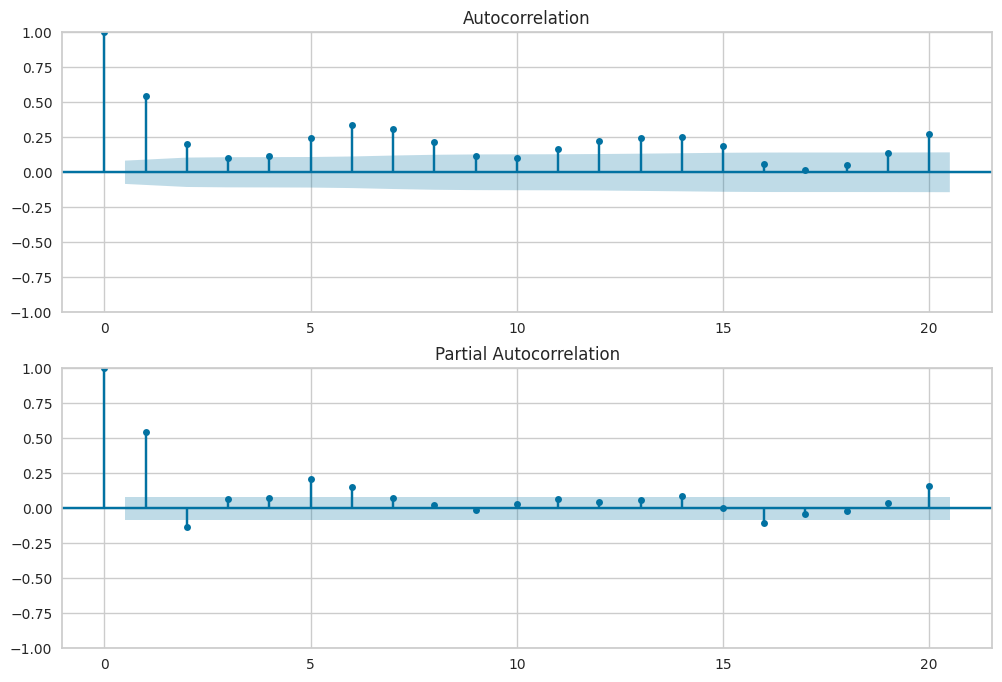

In [26]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['etat_failed'].iloc[7:],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['etat_failed'].iloc[7:],lags=20,ax=ax2)

In [27]:
from statsmodels.tsa.arima.model import ARIMA

In [28]:
model=ARIMA(df['etat_failed'],order=(1,1,1))
model_fit=model.fit()

In [29]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            etat_failed   No. Observations:                  562
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3143.551
Date:                Mon, 05 Jun 2023   AIC                           6293.102
Time:                        10:03:08   BIC                           6306.091
Sample:                    11-18-2021   HQIC                          6298.173
                         - 06-02-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4454      0.017     26.655      0.000       0.413       0.478
ma.L1         -0.9533      0.011    -89.017      0.000      -0.974      -0.932
sigma2      4300.1155     56.441     76.187      0.000    4189.493    4410.738
===================================================================================
Ljung-Box (L1) (Q):                   4.76   Jarque-Bera (JB):             40872.92
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               0.11   Skew:                             4.72
Prob(H) (two-sided):                  0.00   Kurtosis:                        43.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='date_exploitation'>

[06/05/23 10:03:14] WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=527746;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=600266;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=479469;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=188735;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=476341;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=258761;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=235875;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=458723;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=958524;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=524378;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=724618;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=592494;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=298920;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=649412;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=765340;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=981288;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=637997;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=206049;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=942614;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=308038;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=654421;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=362062;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=655617;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=714259;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=279158;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=319443;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=841712;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=686242;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=832994;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=163727;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=551609;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=303399;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=785663;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=980158;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=940600;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=671099;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=269489;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=959022;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=840294;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=200915;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

[06/05/23 10:03:15] WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=197920;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=116606;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=851440;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=988088;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=864454;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=335593;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=414965;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=292691;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=330718;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=409520;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=179934;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=570167;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=516098;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=315411;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=825447;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=320440;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=391608;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=359849;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=303106;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=866180;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=700393;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=757833;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=714858;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=397555;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=566509;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=941764;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=372116;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=927176;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=630662;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=26062;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=296968;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=7767;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=376366;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=398282;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=203130;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=583490;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=817125;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=692959;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=187820;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=901016;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=630705;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=932985;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=876887;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=674919;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=881796;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=598291;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=706192;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=544004;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=790702;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=109381;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=528606;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=231552;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=343459;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=412524;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=943669;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=336143;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=131049;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=241168;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=107368;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=824842;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=254404;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=531295;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=166535;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=196499;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=601207;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=438045;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=494420;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=908414;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=369547;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=606511;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=32982;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=99765;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=933310;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=899194;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=829228;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=328722;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=800115;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=356831;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=150620;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=160989;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=583036;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=574122;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=242318;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=340018;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=255407;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=738685;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=180196;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=847023;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=89592;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=163878;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=383695;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=610732;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=598900;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=616126;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=965355;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=618160;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=774895;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=437411;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=251213;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=190456;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=848677;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=933288;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=732980;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=945462;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=765976;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=555289;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=659516;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=277814;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=818685;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=693170;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=60719;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=227253;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=196060;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=758602;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=512651;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=279957;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=522695;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=431187;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=308200;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=786991;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=282204;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=92953;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=520584;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=543118;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=287468;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=892314;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=630662;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=68192;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=723603;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=852519;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=557568;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=886851;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=621326;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=419829;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=866902;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=92060;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=762146;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=925677;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=698125;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=489636;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=567351;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=155412;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=810008;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=15138;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=816006;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=179132;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=182227;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=796797;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=711609;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=473378;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=836590;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=405320;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=395170;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=204793;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=829176;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=209368;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=395325;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=199924;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=23788;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=172075;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=782254;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=569760;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=818838;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=34434;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=615643;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=787194;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=85456;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=98749;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=606425;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=206138;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=457493;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=236983;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=793660;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=13444;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=512710;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=39502;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=409804;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=925090;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=672054;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=28166;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=104491;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=639091;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=833221;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=928580;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

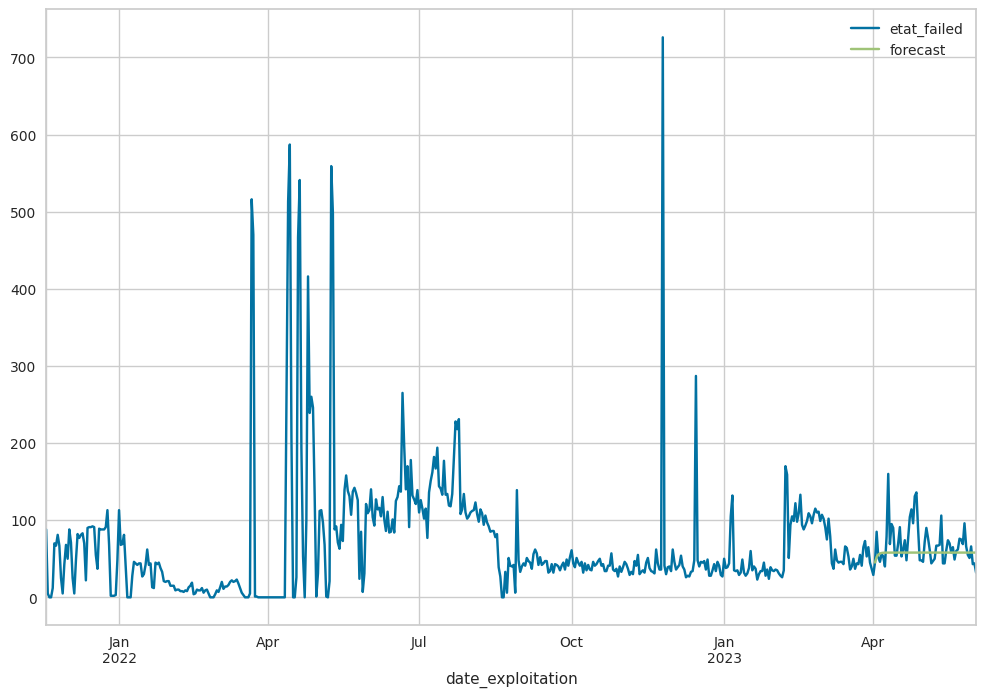

In [30]:
df['forecast']=model_fit.predict(start=500,end=562,dynamic=True)
df[['etat_failed','forecast']].plot(figsize=(12,8))

In [31]:
import statsmodels.api as sm

In [32]:
model=sm.tsa.statespace.SARIMAX(df['etat_failed'],order=(1, 1, 1),seasonal_order=(1,1,1,7))
results=model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.69618D+00    |proj g|=  7.13470D-02

At iterate    5    f=  5.65161D+00    |proj g|=  8.72520D-03

At iterate   10    f=  5.55194D+00    |proj g|=  2.61433D-02


 This problem is unconstrained.



At iterate   15    f=  5.54532D+00    |proj g|=  6.91443D-02

At iterate   20    f=  5.53957D+00    |proj g|=  1.77957D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     32      1     0     0   3.544D-06   5.540D+00
  F =   5.5395658370840000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [46]:
len(df)

562

<Axes: xlabel='date_exploitation'>

[06/05/23 10:03:36] WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=741036;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=353888;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=489823;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=694966;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=451314;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=598173;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=504150;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=711845;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=161743;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=159507;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=168328;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=755799;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=723755;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=503691;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=950966;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=898117;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=635966;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=275922;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=978775;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=232054;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=399335;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=774778;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=6803;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=111343;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=564633;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=602968;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=837092;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=15009;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=364228;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=666481;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=310047;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=494812;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=877293;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=182956;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=369342;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=84836;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=647414;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=122957;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=530515;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=305710;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=551156;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=777667;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=353155;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=765064;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=583320;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=298974;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=328499;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=529416;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=53030;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=199575;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=373563;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=770243;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=271665;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=913118;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=938043;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=913889;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=707052;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=467176;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=366160;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=701013;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=314516;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=697714;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=728019;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=36788;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=602657;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=695138;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=668809;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=466808;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=304305;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=400859;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=167737;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=203905;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=539274;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=439995;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=441544;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=932063;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=661598;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=310293;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=345282;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=43905;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=986063;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=815831;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=344516;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=51379;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=474386;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=10918;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=756752;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=91479;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=306955;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=562030;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=818178;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=584049;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=769777;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=664963;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=888410;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=460464;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=395692;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=204206;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=259151;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=531236;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=641046;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=9391;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=569203;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=464924;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=784324;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=112356;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=779742;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=125492;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=717017;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=354590;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=931577;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=7333;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=594223;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=998111;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=460681;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=95049;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=678455;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=372500;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=470663;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=779680;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=556924;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=322895;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=957270;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=699878;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=962937;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=848239;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=314184;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=171724;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=170277;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=531867;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=960252;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=91296;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=813814;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=315137;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=484016;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=506514;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=946844;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=704534;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=441039;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=686821;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=611415;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=799834;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=974938;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=888753;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=81771;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=175929;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=395331;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=518520;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=763015;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=259531;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=858070;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=849114;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=263508;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=833934;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=624708;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=640671;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=316926;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=261881;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=347067;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=675797;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=402518;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=611264;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=759154;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=794071;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=385105;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=939461;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=855760;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=744075;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=329539;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=404347;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=424843;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=591277;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=997538;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=475389;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=270005;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=68210;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=628341;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=274064;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=554745;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=405542;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=728701;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=519149;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=43521;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=486260;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=54890;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=974100;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=275257;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=848616;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=103259;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=995972;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=830452;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=601222;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=387187;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=943000;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=708994;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=215212;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=420002;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=411873;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=840994;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=75913;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=223530;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=438241;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=382834;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=375940;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=118612;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=990106;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=148076;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=510878;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=105561;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=228636;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=505177;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=142991;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=304363;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=234595;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=306454;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=998250;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=311971;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=662443;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=306084;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=778420;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=131646;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=561741;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=732928;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=567502;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

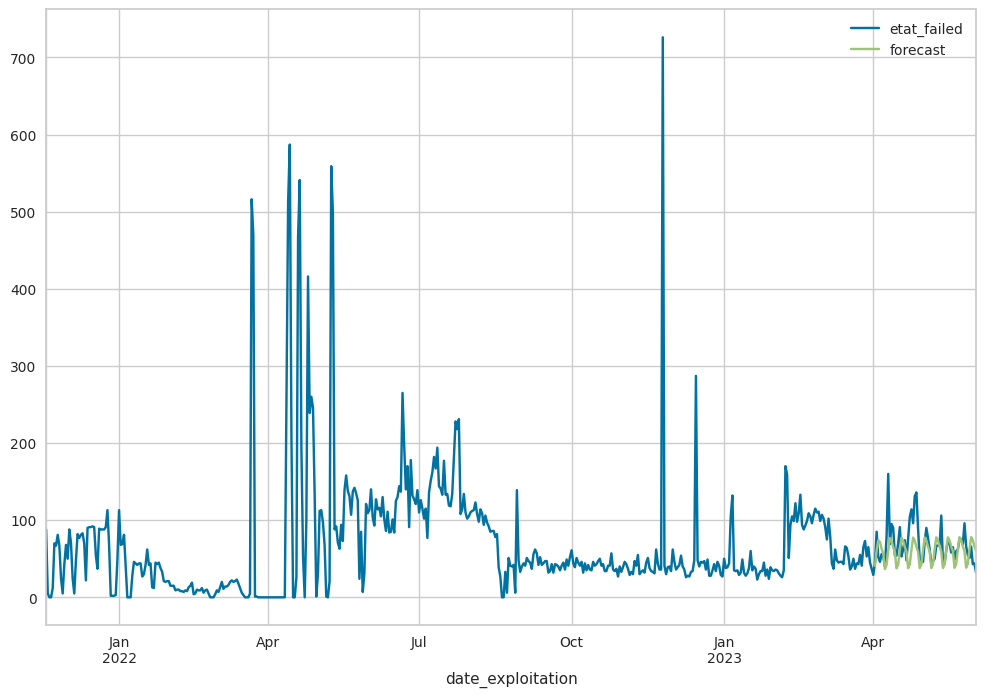

In [33]:
df['forecast']=results.predict(start=500,end=562,dynamic=True)
df[['etat_failed','forecast']].plot(figsize=(12,8))

<Axes: xlabel='date_exploitation'>

[06/05/23 10:03:44] WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=944525;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=287568;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=728501;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=5913;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=253440;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=905419;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=380729;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=573386;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=205043;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=452332;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=28580;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=526431;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=711161;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=156959;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=57438;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=585473;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=236288;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=662757;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=628328;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=520758;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=253256;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=258926;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=674465;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=82844;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=684740;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=150947;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=492357;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=780665;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=741303;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=341175;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=194051;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=578306;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=496552;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=17538;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=221555;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=551916;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=669219;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=750970;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=94707;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=877567;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=994934;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=724722;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=239529;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=296540;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=369848;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=826789;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=558440;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=629051;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=890851;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=196741;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=202869;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=698428;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=484866;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=73141;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=755060;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=667416;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=869797;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=581468;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=587687;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=559924;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=554792;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=711279;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=466533;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=514014;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=10169;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=291427;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=318022;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=424106;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=501242;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=882879;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=12985;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=635606;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=6142;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=367543;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=618403;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=548759;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=361972;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=886636;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=821292;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=374012;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=583717;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=463769;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=75141;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=494353;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=214422;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=474385;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=211498;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=549761;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=990829;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=626021;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=390964;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=90557;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=208226;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=577463;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=220464;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=208677;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=20642;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=738607;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=281600;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=733963;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=535624;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=482471;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=347636;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=963701;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=609273;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=448120;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=561277;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=497713;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=253260;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=517865;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=870010;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=660073;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=123034;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=535977;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=427632;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=303389;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=197052;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=586717;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=136551;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=94681;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=65965;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=45371;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=321647;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=348556;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=361537;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=82551;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=954558;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=724768;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=67248;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=521314;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=940229;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=165579;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=874545;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=544371;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=55415;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=368033;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=423416;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=36714;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=827484;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=381126;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=929409;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=168117;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=7655;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=273080;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=578327;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=667189;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=599222;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=832839;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=301608;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=928641;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=617026;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=368800;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=976967;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=495440;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=471384;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=187998;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=721725;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=995668;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=599057;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=776716;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=793255;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=863793;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=15724;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=166005;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=473078;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=435047;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=215377;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=499536;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=59999;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=5299;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=343076;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=406090;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=16445;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=584258;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=934546;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=828946;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=214431;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=665008;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=111451;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=812776;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=794200;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=530811;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=570852;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=673534;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=819314;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=871557;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=50235;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=117950;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=641205;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=534760;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=572247;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=784956;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=913516;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=754662;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=812026;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=817276;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=500114;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=381471;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=545214;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=369696;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=889579;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=661900;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=622555;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=256776;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=64398;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=610749;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=514711;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=828495;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=877402;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=321360;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=751595;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=778845;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=988402;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=272307;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=656860;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=460889;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=206462;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=313494;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=839211;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=811754;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=784128;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=870726;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=172813;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=337665;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=634839;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=93571;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=86655;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=715773;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=155737;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=655016;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=417612;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=398904;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=958189;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=335865;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=400517;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=594936;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=629454;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=214438;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=385734;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=735870;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=179688;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=292447;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=17942;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=399314;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=737185;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=46234;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=277127;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=912446;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=244365;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=526461;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=785879;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=596162;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=933143;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=309926;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=395998;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=753416;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=179549;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=334949;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=779961;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=756837;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=75797;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=19612;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=808728;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=587100;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=693345;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=604033;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=78048;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=627716;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=6730;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=9959;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=823656;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=97651;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=558403;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=283727;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=639598;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=280555;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=431116;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=180359;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=610052;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=97453;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=107122;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=581303;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=645141;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=213554;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=758970;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=680108;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=684596;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=995008;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

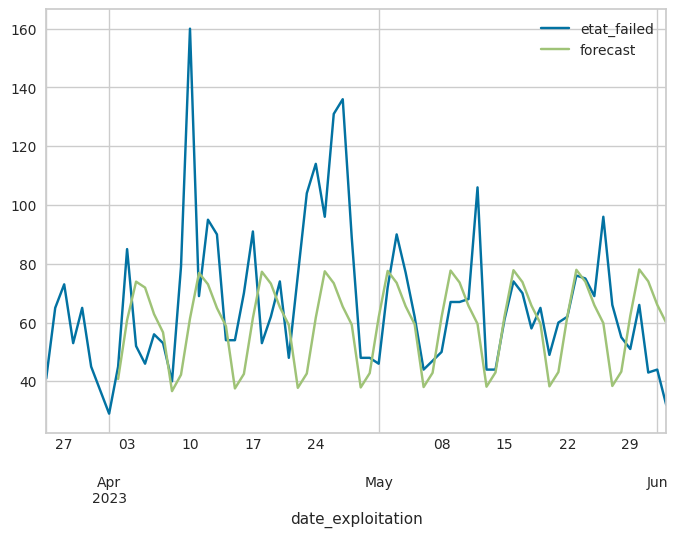

In [34]:
df[['etat_failed', 'forecast']].tail(70).plot()

In [35]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(days=x)for x in range(0,4)]

In [36]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [37]:
future_datest_df

,etat_failed,weekday,Seasonal First Difference,forecast
2023-06-03,NaN,NaN,NaN,NaN
2023-06-04,NaN,NaN,NaN,NaN
2023-06-05,NaN,NaN,NaN,NaN


In [38]:
future_df=pd.concat([df,future_datest_df])

<Axes: >

[06/05/23 10:04:12] WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=208025;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=241029;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=361067;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=680637;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=710063;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=984943;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=793164;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=72203;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=587795;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=654210;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=371650;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=262898;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=188654;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=633426;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=652470;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=431072;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=216132;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=994056;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=618941;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=722411;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=140102;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=85133;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=776538;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=851292;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=871235;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=320457;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=696979;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=66282;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=368993;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=976918;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=106914;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=845650;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=60791;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=771768;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=538845;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=11805;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=271004;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=960789;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=534329;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=825390;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=881921;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=785376;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=861870;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=779035;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=341402;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=354588;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=93301;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=712408;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=874882;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=236421;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=251672;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=546732;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=332507;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=54806;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=676776;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=587890;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=265070;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=835917;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=493766;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=525490;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=562256;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=648216;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=624361;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=140743;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=223789;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=24009;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=856986;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=650781;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=819224;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=460646;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=311892;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=308094;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=93495;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=206290;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=838600;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=767250;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=209090;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=82108;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=212676;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=557422;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=967723;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=123351;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=305767;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=93527;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=157243;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=92977;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=869861;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=909857;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=840033;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=910111;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=545943;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=546479;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=314326;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=979602;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=65326;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=405954;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=489573;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=205150;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=647842;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=106089;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=687024;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=362057;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=752707;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=389647;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=871211;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=553555;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=813543;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=4596;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=29402;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=190923;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=800914;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=70488;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=106479;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=494059;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=448105;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=439646;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=491486;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=308070;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=564512;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=428028;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=576363;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=787458;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=870076;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=962569;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=942513;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=651883;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=318522;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=264273;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=436033;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=936593;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=235106;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=535841;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=222975;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=583120;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=818154;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=747796;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=937758;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=768871;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=53264;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=991416;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=654822;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=876012;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=26530;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=287368;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=843731;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=846866;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=8951;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=429180;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=822028;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=757567;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=529073;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=880278;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=586802;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=848281;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=240560;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=951078;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=213620;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=497482;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=907822;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=442603;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=262448;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=661139;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=824810;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=458452;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=923723;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=186376;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=565919;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=297489;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=729793;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=762088;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=774567;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=30196;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=75221;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=668250;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=854614;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=559742;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=436499;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=356791;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=505657;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=714631;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=545392;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=724463;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=135549;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=809477;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=103267;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=398437;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=741125;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=966458;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=767802;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=314869;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=219727;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=907592;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=715881;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=984424;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=714254;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=726575;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=96103;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=139489;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=82930;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=933786;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=792526;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=977114;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=586373;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=644250;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=760313;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=211022;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=261183;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=476313;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=745683;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=913650;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=796257;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=718602;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

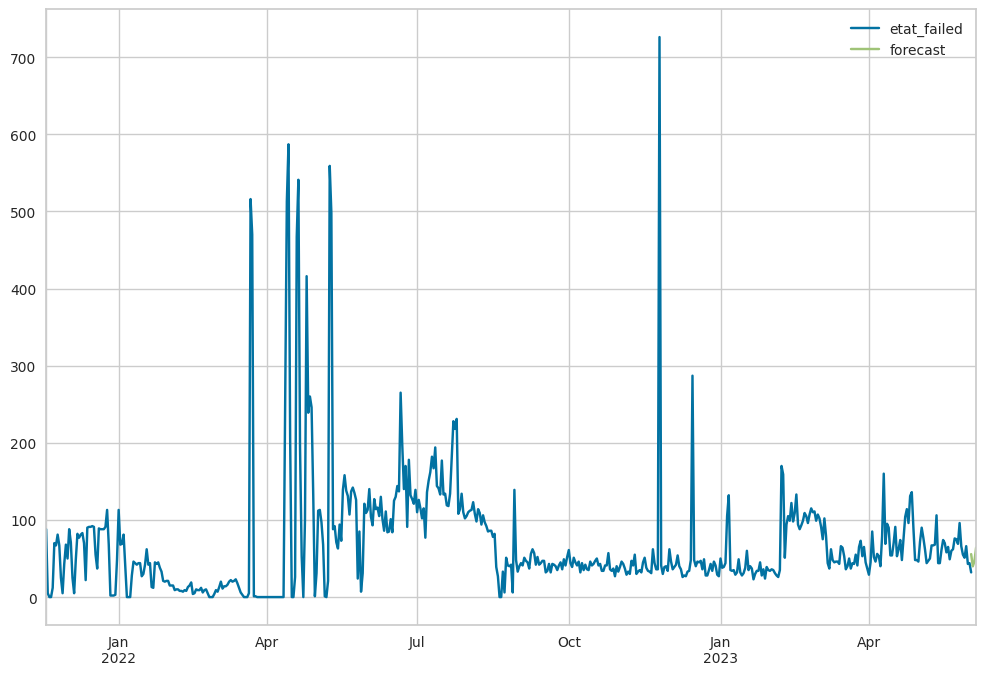

In [39]:
future_df['forecast'] = results.predict(start = 561, end=566, dynamic= True)  
future_df[['etat_failed', 'forecast']].plot(figsize=(12, 8)) 

<Axes: >

[06/05/23 10:04:13] WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=301182;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=162851;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=872968;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=803837;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=7510;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=832554;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=222550;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=502108;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=920325;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=2748;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=450162;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=219531;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=908446;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=21673;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=689770;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=833087;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=501568;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=629120;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=968925;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=589586;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=665380;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=376830;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=298710;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=498820;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=416929;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=807988;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=636992;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=442629;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=617205;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=17144;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=784962;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=86478;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=164815;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=599347;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=837027;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=915925;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=440808;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=218310;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=704215;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=766100;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=613270;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=333239;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=36247;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=770272;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=623043;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=447783;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=149285;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=766281;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=977034;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=849676;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=989694;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=452453;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=650378;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=131188;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=790601;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=631626;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=272903;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=257224;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=272072;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=748140;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=388416;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=805561;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=539180;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=533443;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=494605;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=332888;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=547792;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=942751;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=176103;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=68594;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=577238;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=300631;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=437890;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=752117;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=874524;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=120001;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=113472;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=933458;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=67807;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=740013;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=230919;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=315413;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=970190;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=444313;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=443960;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=666001;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=826624;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=485700;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=808213;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=685109;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=89076;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=567541;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=301868;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=273227;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=445905;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=405019;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=368321;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=953134;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=301601;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=63901;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=493196;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=614696;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=193257;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=471538;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=652205;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=635834;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=851846;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=708485;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=339460;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=571710;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=508051;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=2152;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=757253;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=159363;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=708773;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=848036;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=32055;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=868370;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=399859;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=764170;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=375145;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=788530;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=9749;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=247654;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=114772;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=561789;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=476492;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=341133;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=560197;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=271614;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=801687;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=886179;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=711023;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=754369;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=942696;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=198459;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=215344;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=757306;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=804959;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=818467;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=875584;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=340741;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=933061;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=969631;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=760062;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=368295;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=899779;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=390857;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=898471;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=414871;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=593783;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=837695;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=673136;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=398796;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=183899;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=246804;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=513063;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=855086;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=811059;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=493581;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=267791;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=592820;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=320790;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=776644;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=650802;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=536516;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=622612;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=505576;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=506788;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=907134;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=287780;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=814695;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=795180;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=434691;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=660062;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=507964;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=748344;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=29219;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=273965;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=921489;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=220607;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=416666;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=574439;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=79256;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=586050;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=215778;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=911477;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=690067;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=220954;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=170406;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=354100;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=81162;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=534459;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=642491;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=309607;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=377263;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=701411;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=960552;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=871849;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=186842;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=667922;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=157200;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=952665;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=192645;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=985111;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=390039;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=926781;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=276484;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=759877;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=105760;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=915139;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=270245;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=358162;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=662134;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=52554;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=723131;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=261798;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=594331;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=764430;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=143603;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=189083;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=166627;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=799722;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=636264;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=738077;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=295271;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=463433;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=873284;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=552087;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=429261;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=351520;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=656462;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=524193;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=877872;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=523000;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=115379;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=209144;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=482177;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=463074;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=80198;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=725277;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=867854;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=778446;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=606685;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=388340;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=915541;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=422918;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=528776;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=331377;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=536636;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=36414;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=988952;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=502840;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=10470;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=776045;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=181096;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=341905;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=127457;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=613499;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=133052;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=141386;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=776894;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=679924;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=507407;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=933813;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=242586;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=568117;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=624942;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=19602;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=336336;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=849244;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=596261;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=561098;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=445232;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=593654;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=930873;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=536887;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=831509;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=42271;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=783195;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=820646;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=270308;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=489125;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=121188;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=464435;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=837226;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=817669;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=729814;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=108635;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=491335;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=223459;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=28501;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=795694;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=850641;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=128024;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=328271;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=953693;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=141849;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=950085;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=582222;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=49752;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=673989;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=56783;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=247371;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=705950;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=272414;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=707795;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=250372;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=741095;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=373365;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=765072;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=123820;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=416092;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=783755;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=660463;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=137034;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=201519;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=696019;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=584794;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=76540;file:///home/ifeoluwa/anaconda3/envs/backend/lib/python3.10/site-packages/matplotlib/font_manager.py#1332\1332]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

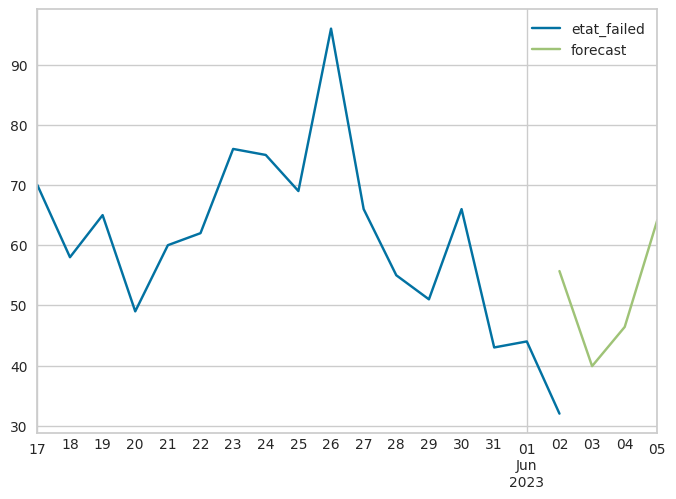

In [40]:
future_df[['etat_failed', 'forecast']].tail(20).plot()

In [41]:
df.tail(62)

,etat_failed,weekday,Seasonal First Difference,forecast
date_exploitation,,,,
2023-04-02,45.0,6,-28.0,40.791007
2023-04-03,85.0,0,32.0,60.848333
2023-04-04,52.0,1,-13.0,73.920451
2023-04-05,46.0,2,1.0,71.907028
2023-04-06,56.0,3,19.0,62.880272
...,...,...,...,...
2023-05-29,51.0,0,-25.0,62.305185
2023-05-30,66.0,1,-9.0,78.072800
2023-05-31,43.0,2,-26.0,74.024170


In [42]:
df['AE'] = abs(df['etat_failed'] - df['forecast'])

In [43]:
df['AE'].tail(62).mean()

18.3832676408899

In [44]:
df['etat_failed'].mode()

0    0.0
Name: etat_failed, dtype: float64

In [45]:
future_df.tail()

,etat_failed,weekday,Seasonal First Difference,forecast
2023-06-01,44.0,3,-52.0,NaN
2023-06-02,32.0,4,-34.0,55.696661
2023-06-03,NaN,NaN,NaN,39.892982
2023-06-04,NaN,NaN,NaN,46.411499
2023-06-05,NaN,NaN,NaN,64.186803
